In [102]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [103]:
seed_value = 42
tf.random.set_seed(seed_value)

In [104]:
train = ImageDataGenerator(
    rescale =1./255,
    horizontal_flip =True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

train_generator =train.flow_from_directory(
    'final/train',
    target_size=(256,256),
    batch_size=32,
    seed=seed_value,
    class_mode='sparse'
    
)

Found 10325 images belonging to 3 classes.


In [105]:
class_names = list(train_generator.class_indices.keys())
class_names

['Banana', 'Mango', 'Papaya']

In [106]:
validation= ImageDataGenerator(
    rescale =1./255,
    horizontal_flip =True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

val_generator =validation.flow_from_directory(
    'final/val',
    target_size=(256,256),
    batch_size=32,
    class_mode='sparse',
    seed=seed_value
)

Found 1474 images belonging to 3 classes.


In [107]:
test = ImageDataGenerator(
    rescale =1./255,
    horizontal_flip =True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

test_generator =test.flow_from_directory(
    'final/test',
    target_size=(256,256),
    batch_size=32,
    class_mode='sparse',
    seed=seed_value
)

Found 2952 images belonging to 3 classes.


In [108]:
input_shape=(256,256,3)
n_classes= 3

model= models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size =(3,3), activation='relu'), #32filters, relu activation
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size =(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size =(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(), #flattens to 1d array
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [109]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [113]:
history = model.fit(
    train_generator,
    epochs=5,  
    validation_data=val_generator,
    validation_steps=3,
    verbose=1
)


Epoch 1/5
323/323 [==============================] - ETA: 0s - batch: 161.0000 - size: 31.9659 - loss: 0.1460 - accuracy: 0.9492

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


323/323 [==============================] - 1150s 4s/step - batch: 161.0000 - size: 31.9659 - loss: 0.1460 - accuracy: 0.9492 - val_loss: 0.1178 - val_accuracy: 0.9479
Epoch 2/5
323/323 [==============================] - 718s 2s/step - batch: 161.0000 - size: 31.9659 - loss: 0.0725 - accuracy: 0.9733 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 3/5
323/323 [==============================] - 953s 3s/step - batch: 161.0000 - size: 31.9659 - loss: 0.0405 - accuracy: 0.9838 - val_loss: 0.0474 - val_accuracy: 0.9792
Epoch 4/5
323/323 [==============================] - 880s 3s/step - batch: 161.0000 - size: 31.9659 - loss: 0.0342 - accuracy: 0.9877 - val_loss: 0.0255 - val_accuracy: 0.9792
Epoch 5/5
323/323 [==============================] - 949s 3s/step - batch: 161.0000 - size: 31.9659 - loss: 0.0239 - accuracy: 0.9921 - val_loss: 0.0622 - val_accuracy: 0.9792


In [114]:
scores = model.evaluate(test_generator)
print("Fruit Type Test Accuracy: {:.2f}%".format(scores[1] * 100))

Fruit Type Test Accuracy: 99.19%


In [121]:
acc=history.history['accuracy']
val_acc= history.history['val_accuracy']

loss= history.history['loss']
val_loss= history.history['val_loss']

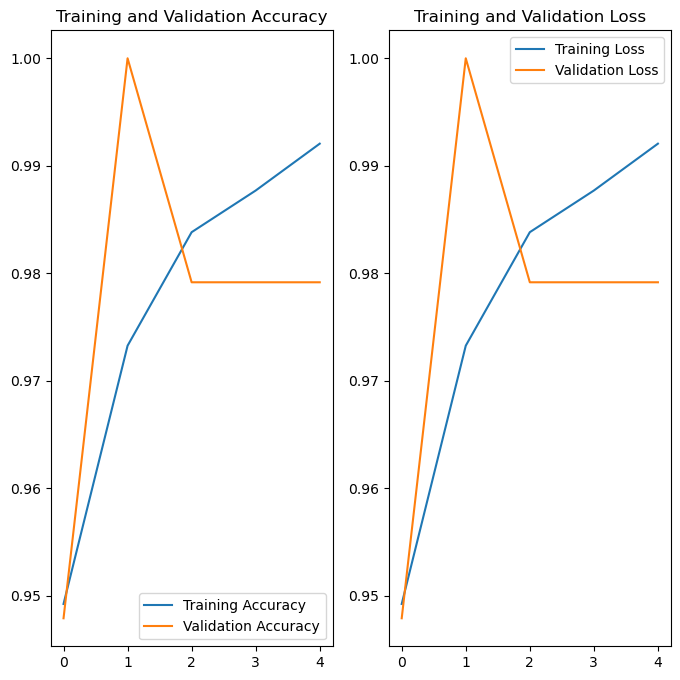

In [123]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(5), acc, label='Training Accuracy')
plt.plot(range(5),val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(5), acc, label='Training Loss')
plt.plot(range(5),val_acc, label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

plt.show()

first image to predict
actual label: Banana
predicted label: Banana


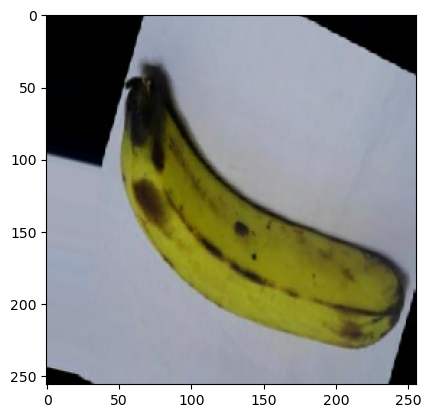

In [124]:
import numpy as np
for image_batch, label_batch in test_generator:
    first_image= image_batch[0]
    first_label = int(label_batch[0])
    
    print('first image to predict' )
    plt.imshow(first_image)
    print('actual label:', class_names[first_label])
    
    batch_prediction= model.predict(image_batch)
    print('predicted label:', class_names[np.argmax(batch_prediction[0])])
    
    break

In [127]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array, steps=1)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

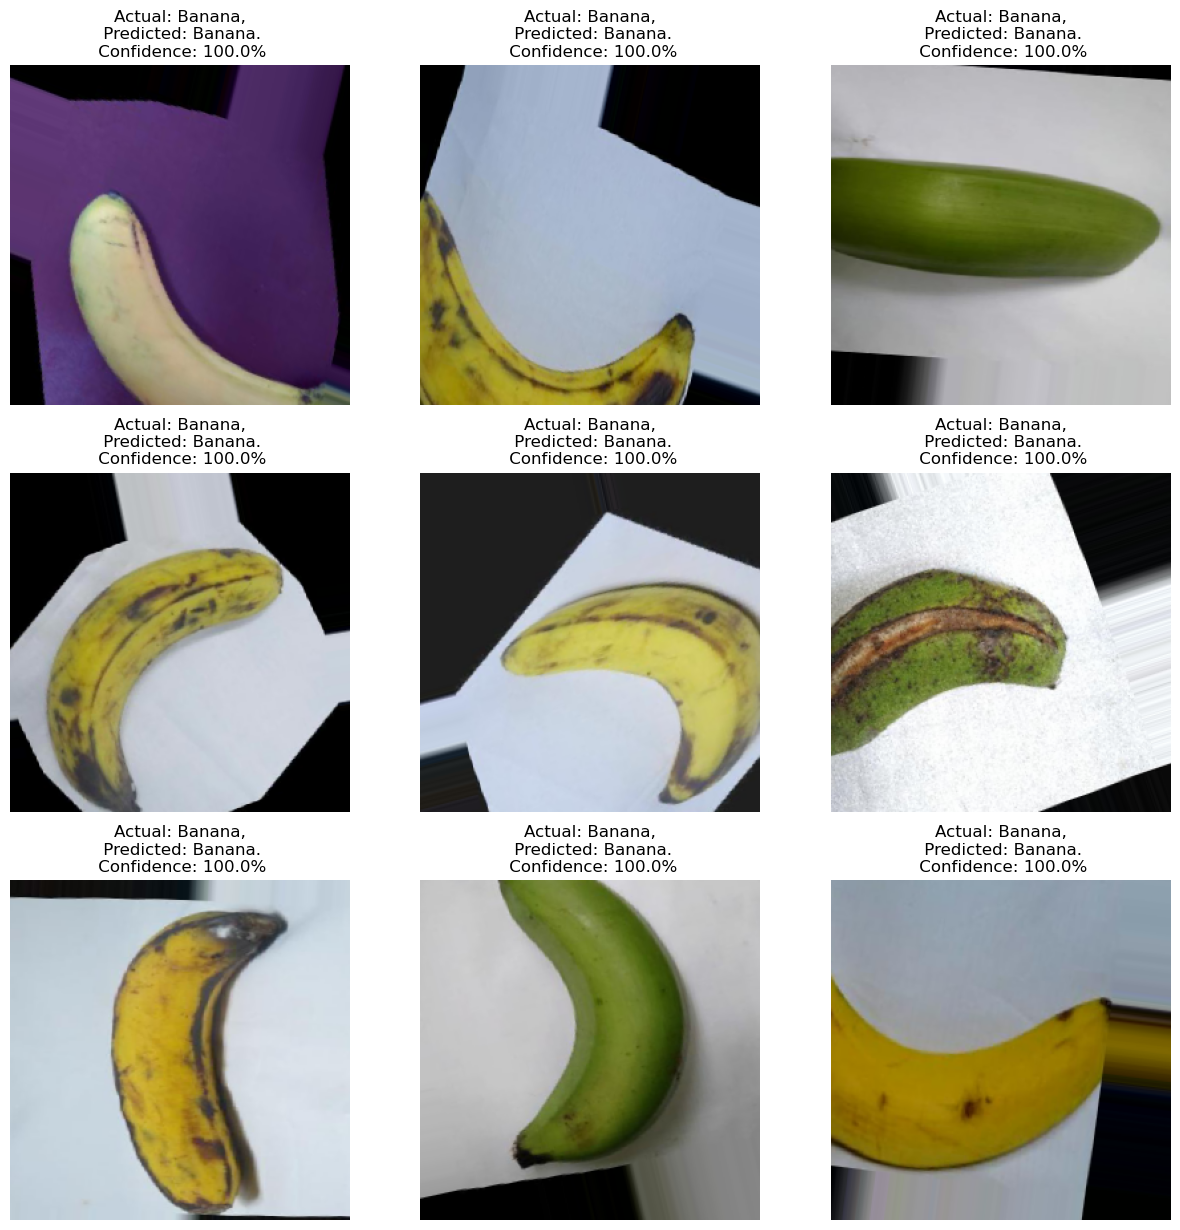

In [140]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [115]:
model.save("Fruitdetection.h5")

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


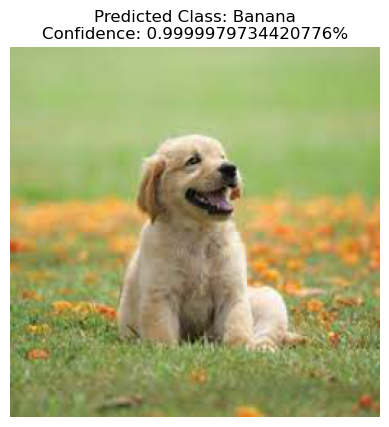

In [155]:
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image

def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((256, 256)) 
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  
    return img_array, img

def predict(model, img_array, threshold=0.78):
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class_index]

    if confidence < threshold:
        return "Unknown", confidence
    else:
        predicted_class = class_names[predicted_class_index]
        return predicted_class, confidence


image_path = 'test_images/test.jpg'
img_array, img = load_and_preprocess_image(image_path)
predicted_class, confidence = predict(model, img_array)

plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}\nConfidence: {confidence}%")
plt.axis("off")
plt.show()
   

In [ ]:
#Now ripeness classification.
#Equal_dataset model is saved as "ripeness.h5"
#now we are gonna predict

In [135]:
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image

fruit_detection_model = tf.keras.models.load_model('Fruitdetection.h5')
ripeness_model = tf.keras.models.load_model('ripeness.h5')

def load_and_preprocess_image(input_image):
    img = Image.open(input_image)
    img = img.resize((256, 256)) 
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  
    return img_array, img


In [138]:
input_image = load_and_preprocess_image('test_images/test.jpg')  

In [ ]:
if fruit_classes[predicted_class_index] in fruit_classes:
    ripeness_predictions = ripeness_model.predict(input_image)
    ripeness_class = np.argmax(ripeness_predictions)
    print(f"The predicted ripeness class is: {ripeness_class}")
else:
    print("The input image does not belong to any of the expected fruit classes.")


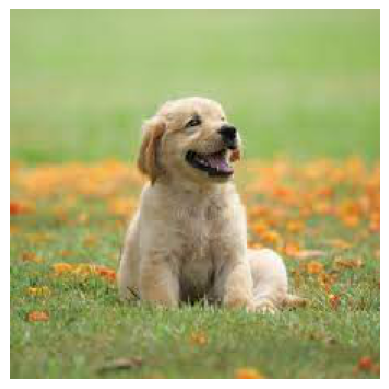

It's a fruit!
Ripeness Level: [2]


In [143]:
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np
from PIL import Image

# Load the fruit identification model
fruit_model = keras.models.load_model('Fruitdetection.h5')

# Load the ripeness identification model
ripeness_model = keras.models.load_model('ripeness.h5')

def predict_fruit_and_ripeness(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Predict if it's a fruit using the fruit model
    fruit_prediction = fruit_model.predict(img_array)

    # Set a threshold for fruit identification
    fruit_threshold = 0.5
    is_fruit = fruit_prediction[0][0] > fruit_threshold
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    if is_fruit:
        # If it's a fruit, proceed to predict ripeness using the ripeness model
        img_array_resized = np.array(Image.open(image_path).resize((256, 256)))
        img_array_resized = np.expand_dims(img_array_resized, axis=0)
        img_array_resized = preprocess_input(img_array_resized)

        ripeness_prediction = ripeness_model.predict(img_array_resized)
        ripeness_label = np.argmax(ripeness_prediction, axis=1)
        # You can define your ripeness labels and their corresponding values

        print("It's a fruit!")
        print("Ripeness Level:", ripeness_label)
    else:
        print("Not a fruit!")

# Replace 'path/to/your/image.jpg' with the actual path to your image
image_path = 'test_images/test.jpg'
predict_fruit_and_ripeness(image_path)
